# Degradation Model

In this notebook a SEI EC Reaction driven degradation model was created similar to Changing a model notebook example. This notebook demonstrates the ageing of cells in a battery pack.

In [23]:
import pybamm
import numpy as np
import liionpack as lp

A 4parallel 1series (4p1s) pack is defined.

In [24]:
I_mag = 30.0
OCV_init = 4.0  # used for intial guess
Ri_init = 5e-2  # used for intial guess
R_busbar = 1.5e-3
R_connection = 1e-2
Np = 4
Ns = 1
Nbatt = Np * Ns

Let us create a netlist

In [25]:
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Rb=R_busbar, Rc=R_connection, Ri=Ri_init, V=OCV_init, I=I_mag)

Following experimental protocol with 100 cycles is used for the pack simulation. This will be the applied terminal current for each time step. 

In [26]:
experiment = pybamm.Experiment(
    ["Charge at 15 A for 10 minutes", "Rest for 10 minutes", "Discharge at 15 A for 10 minutes", "Rest for 10 minutes"]*100,
    period="30 seconds",)

Chen2020 parameter set collected for the LG M50 21700 5Ah cell is used in the simulation.

In [27]:
chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)

Lets pick a variables for the output

In [28]:
output_variables = [  
    'X-averaged total SEI thickness [m]',
    'Loss of capacity to SEI [A.h]',
    ]

Solve the pack with SEI EC Reaction driven degradation model with sim_func=lp.SEIdegradation_simulation. 

In [29]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    sim_func=lp.SEIdegradation_simulation,
    output_variables=output_variables,
)

Stepping simulation: 100%|███████████████████████████████████████████████████████| 8001/8001 [00:54<00:00, 145.61it/s]


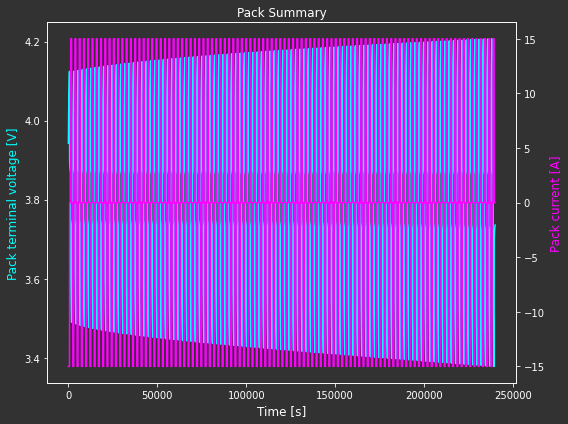

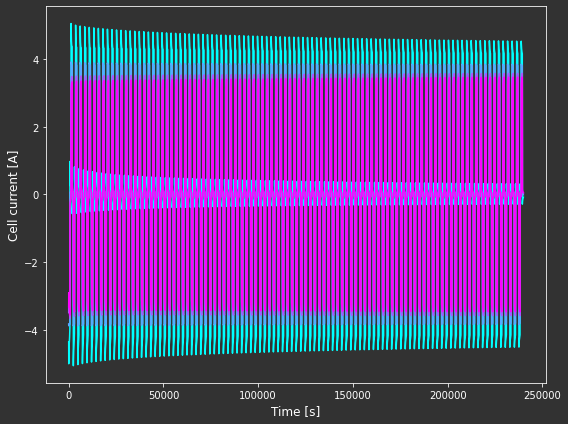

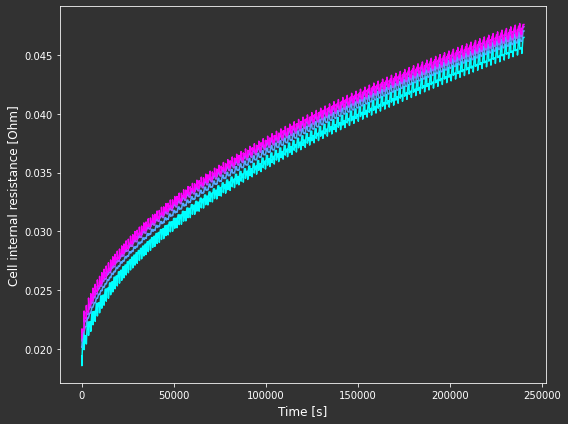

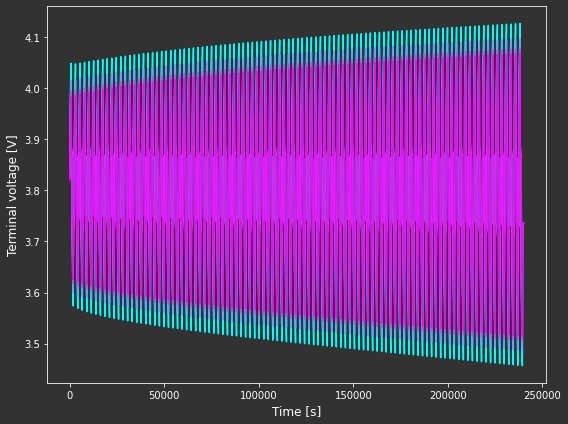

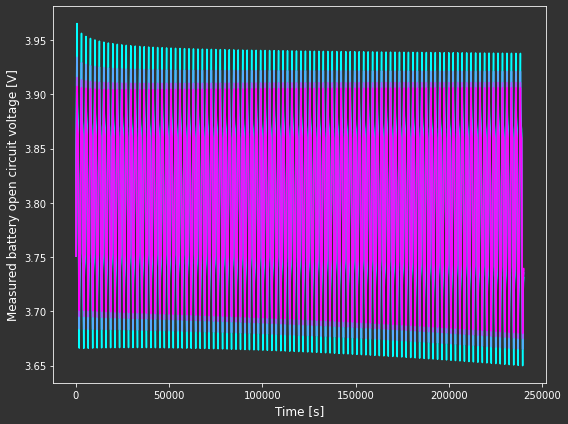

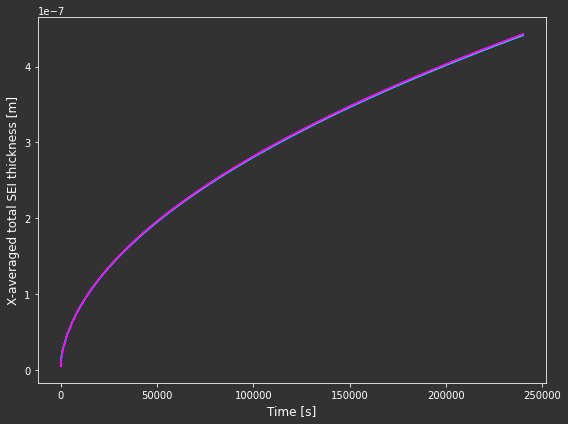

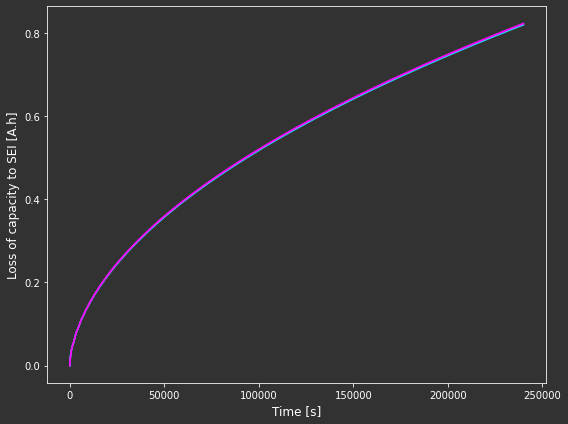

In [30]:
lp.plot_output(output)

We can change the EC initial concentration in electrolyte [mol.m-3] for each cell and see the capacity loss for each cell.

In [31]:
parameter_values.update({"EC initial concentration in electrolyte [mol.m-3]": "[input]"})
EC_conc=np.array([4000.0,3500.0,3000.0,2500.0])
inputs = {"EC initial concentration in electrolyte [mol.m-3]":EC_conc}

In [32]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    sim_func=lp.SEIdegradation_simulation,inputs=inputs,
    output_variables=output_variables,
)

Stepping simulation: 100%|███████████████████████████████████████████████████████| 8001/8001 [00:55<00:00, 142.90it/s]


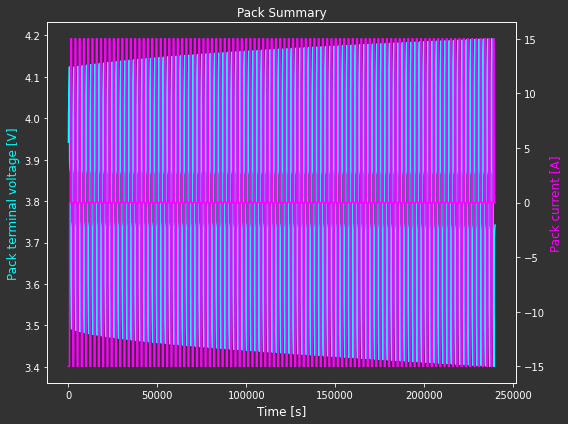

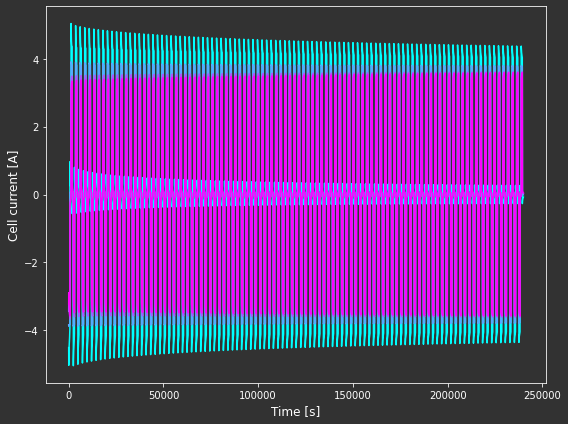

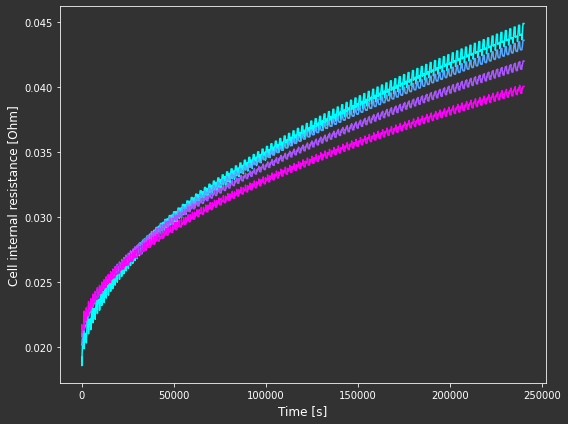

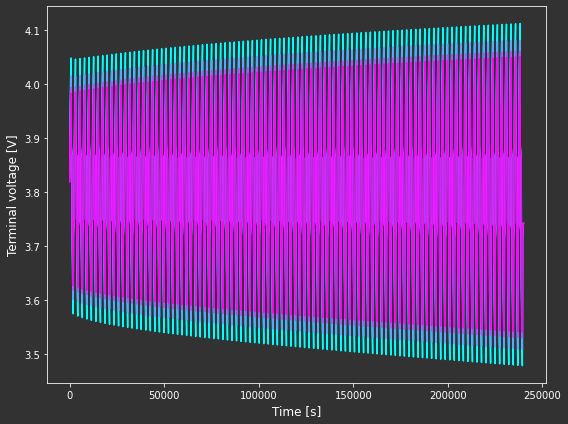

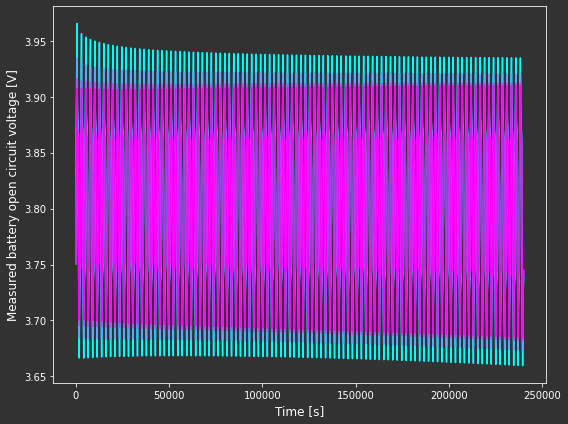

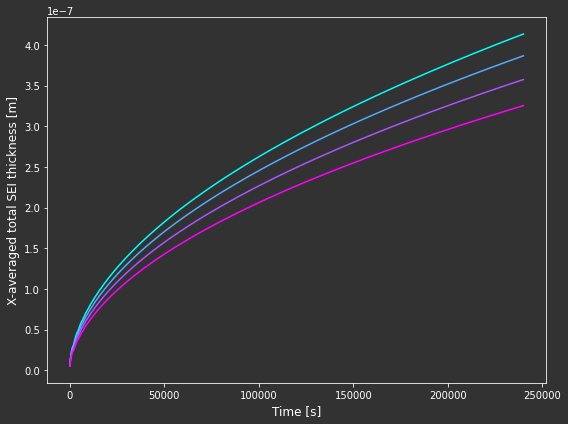

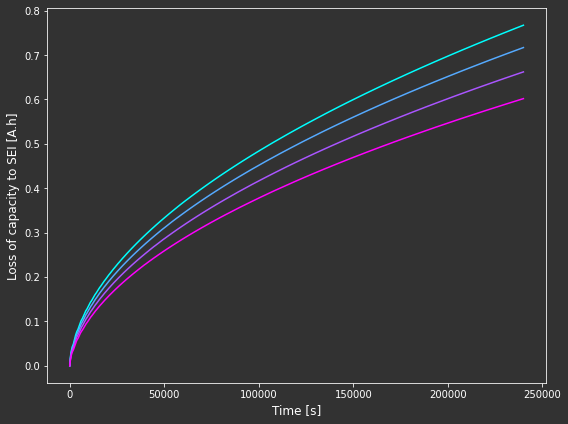

In [33]:
lp.plot_output(output)